

```
# This is formatted as code
```



Step 0 : Visualizing the dataset and Exploratory Data Analysis

In [29]:
import pandas as pd

data = pd.read_csv('/content/boston_housing.csv')

In [30]:
data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [31]:
#Check if there is missing data
data.isnull().sum()


Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

Text(0.5, 1.0, 'Histogram of MEDV')

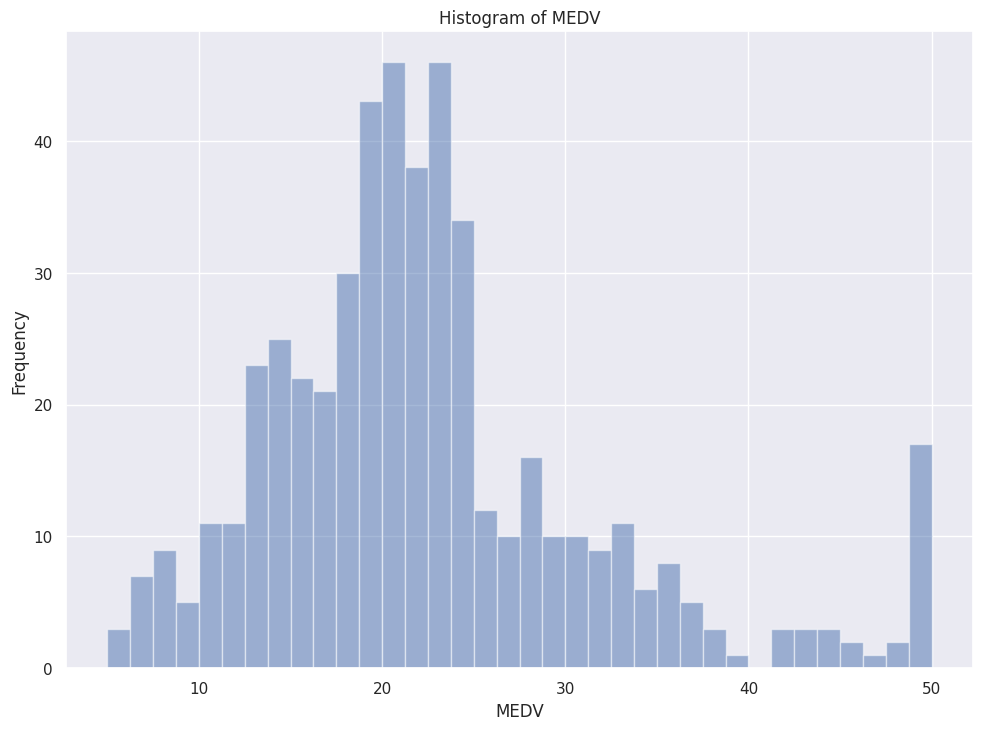

In [32]:
import matplotlib.pyplot as plt
data['MEDV'].plot.hist(bins=36, alpha=0.5)
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.title('Histogram of MEDV')

<ipython-input-33-d1f6898638fb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MEDV'], bins=30)


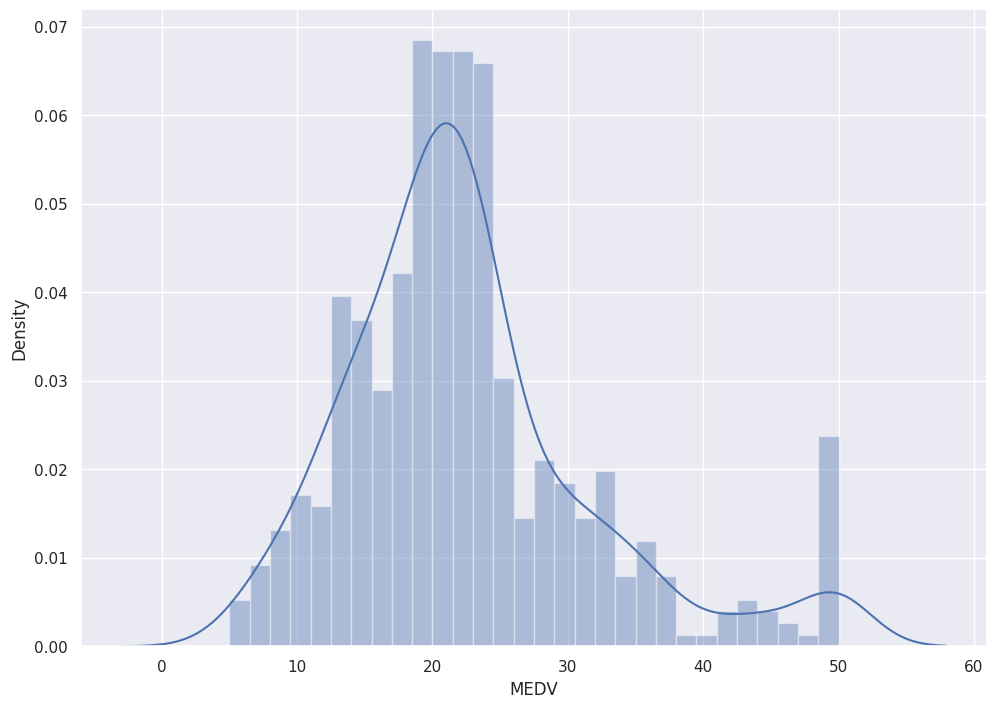

In [33]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['MEDV'], bins=30)
plt.show()

<Axes: >

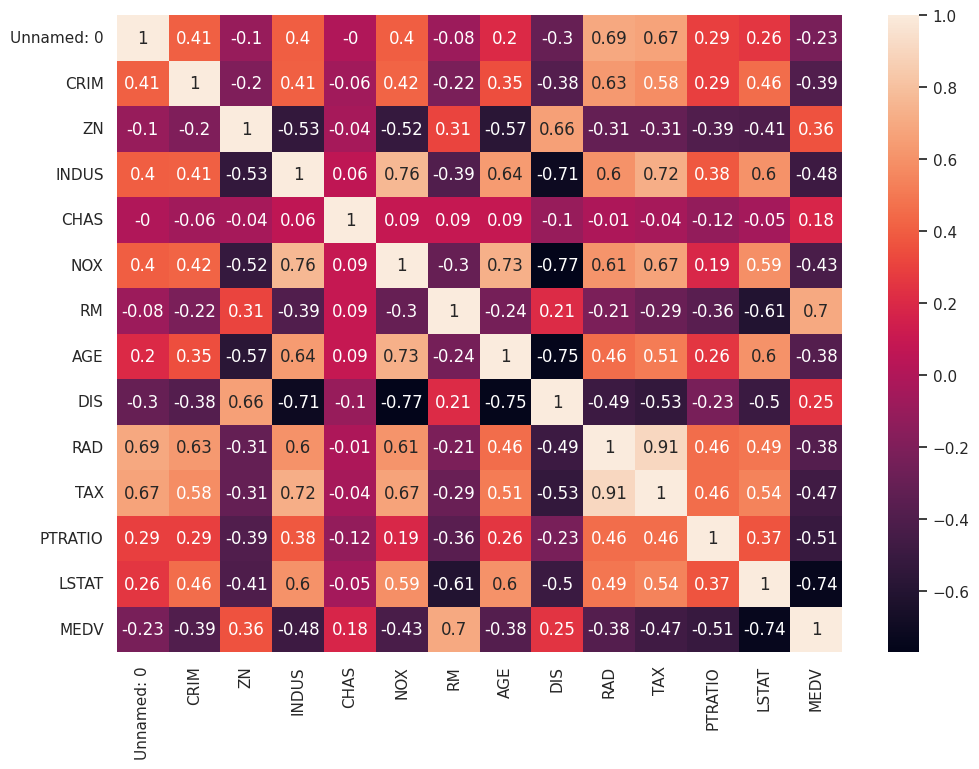

In [34]:

correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

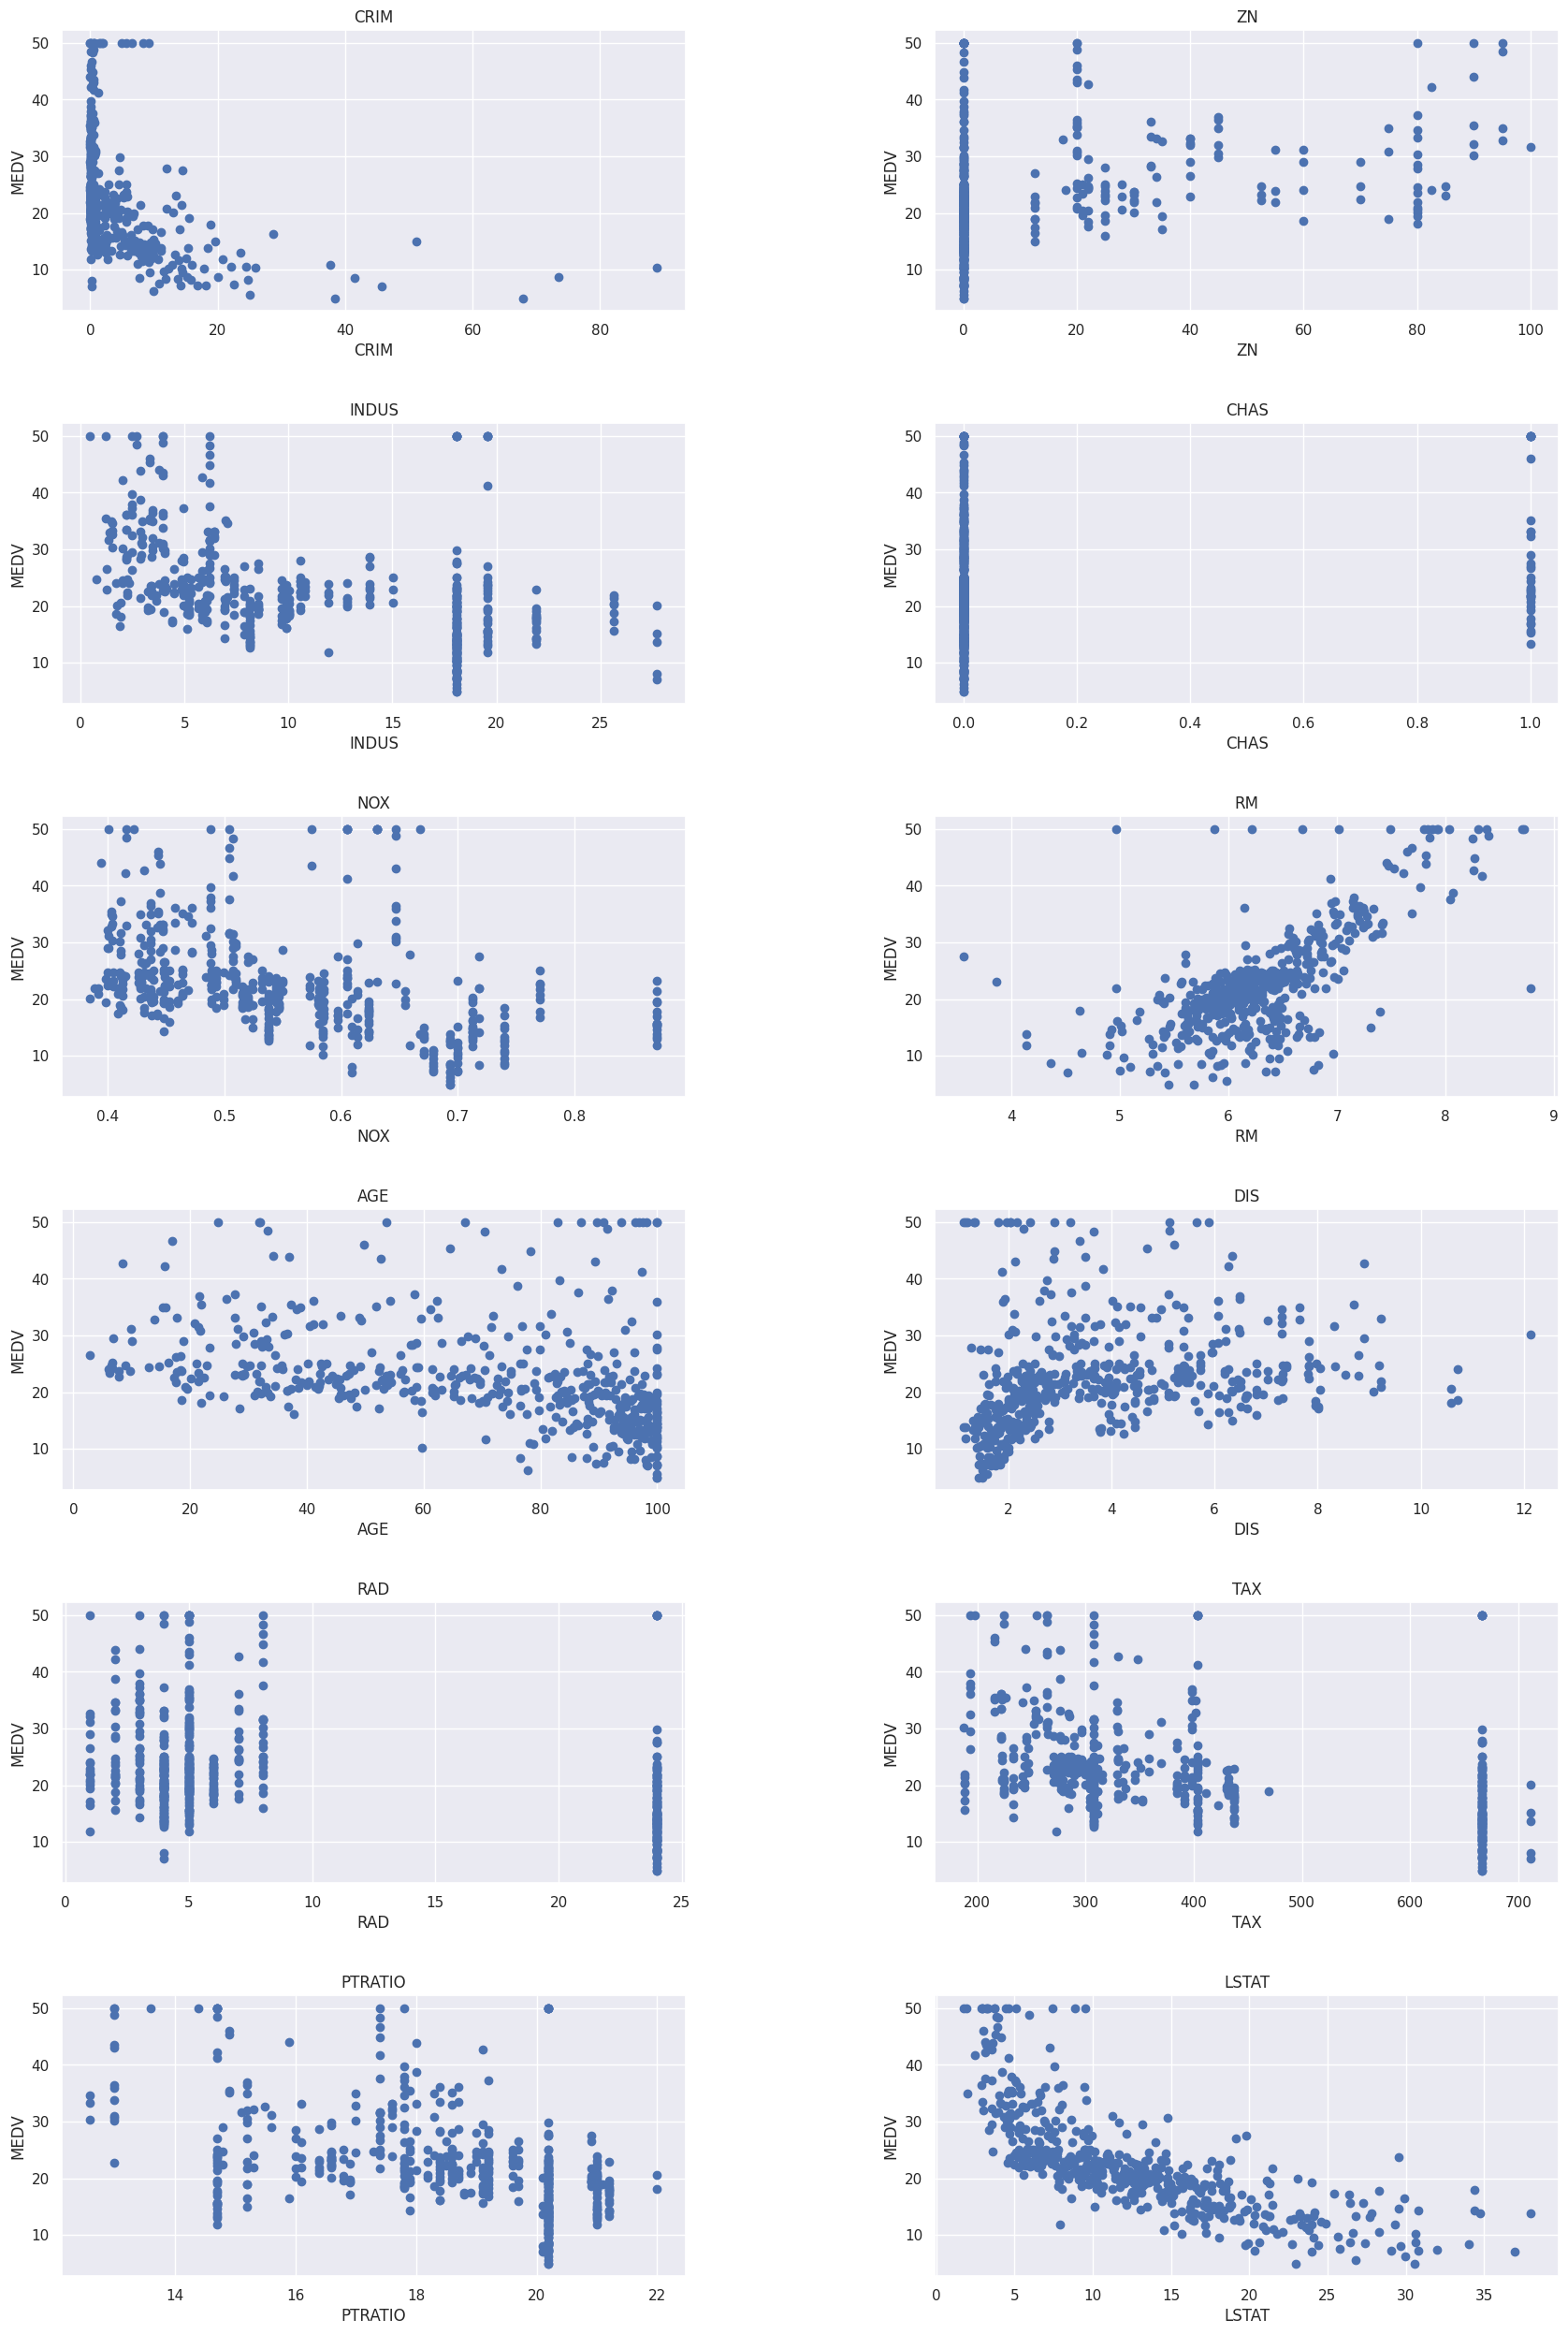

In [35]:
plt.figure(figsize=(20, 30))

features = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD', 'TAX','PTRATIO','LSTAT']
target = data['MEDV']

for i, col in enumerate(features):
    plt.subplot(6, 2 , i+1)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')



Step 1: Data Preprocessing and Model Choice

In [36]:
#Taking LSTAT and RM for training data
#Prepare data for training the model
import numpy as np
from sklearn.preprocessing import MinMaxScaler

X = pd.DataFrame(np.c_[data['LSTAT'], data['RM']], columns = ['LSTAT','RM'])
Y = data['MEDV']
print(X,y)


     LSTAT     RM
0     4.98  6.575
1     9.14  6.421
2     4.03  7.185
3     2.94  6.998
4     5.33  7.147
..     ...    ...
501   9.67  6.593
502   9.08  6.120
503   5.64  6.976
504   6.48  6.794
505   7.88  6.030

[506 rows x 2 columns] 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


Step 2: Training and testing dataset

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 2)
(152, 2)
(354,)
(152,)


Step 3: Train with Linear Regression model



In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_linearregression = LinearRegression()
model_linearregression.fit(X_train, Y_train)

LinearRegression()

Step 4: Linear Regression Model Performance Evaluation

In [26]:
from sklearn.metrics import r2_score,mean_absolute_error
# model evaluation for training set
y_train_predict = model_linearregression.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("Linear Regression evaluation")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = model_linearregression.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for training set
--------------------------------------
RMSE is 5.291267334085863
R2 score is 0.6493177656003104


The model performance for testing set
--------------------------------------
RMSE is 6.041044703455954
R2 score is 0.6162026947666575


Step 5: Training with SVM model

In [39]:
from sklearn.svm import SVR
from sklearn.svm import SVC
model_svm = SVR()
model_svm.fit(X_train,Y_train)

SVR()

Step 6: SVM Model Performance Evaluation

In [40]:
# model evaluation for training set
y_train_predict = model_svm.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("SVM evaluation")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = model_svm.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

SVM evaluation
The model performance for training set
--------------------------------------
RMSE is 5.363540216530558
R2 score is 0.639672474435614


The model performance for testing set
--------------------------------------
RMSE is 6.1437557911054235
R2 score is 0.6030409467174964
